# Decision Trees

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

#import dataset

pg = pd.read_csv("https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv")
pg = pg.dropna()
pg = pg.drop(['species','island'], axis = 1)
pg.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,male
1,39.5,17.4,186.0,3800.0,female
2,40.3,18.0,195.0,3250.0,female
4,36.7,19.3,193.0,3450.0,female
5,39.3,20.6,190.0,3650.0,male


## Build training sets

We will use penguin datasets with male(1) and female(0) as dummy variables. 

In [31]:
pg.sex = pg.sex.replace({'male':1, 'female':0})
X = pg.drop('sex', axis = 1)
y = pg['sex']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [32]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, random_state=42)

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

Now that our model has been trained we can visualize the tree structure of our current model by calling the ```sklearn.tree.plot_tree()``` function. An example of this can be seen by running the following code cell.

|--- x_1 <= 18.05
|   |--- x_3 <= 5025.00
|   |   |--- x_1 <= 14.85
|   |   |   |--- class: 0
|   |   |--- x_1 >  14.85
|   |   |   |--- x_3 <= 3712.50
|   |   |   |   |--- x_0 <= 48.30
|   |   |   |   |   |--- x_0 <= 40.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_0 >  40.45
|   |   |   |   |   |   |--- x_0 <= 40.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_0 >  40.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  48.30
|   |   |   |   |   |--- x_0 <= 49.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_0 >  49.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- x_3 >  3712.50
|   |   |   |   |--- x_0 <= 46.05
|   |   |   |   |   |--- x_0 <= 38.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_0 >  38.45
|   |   |   |   |   |   |--- x_3 <= 3975.00
|   |   |   |   |   |   |   |--- x_1 <= 17.30
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |-

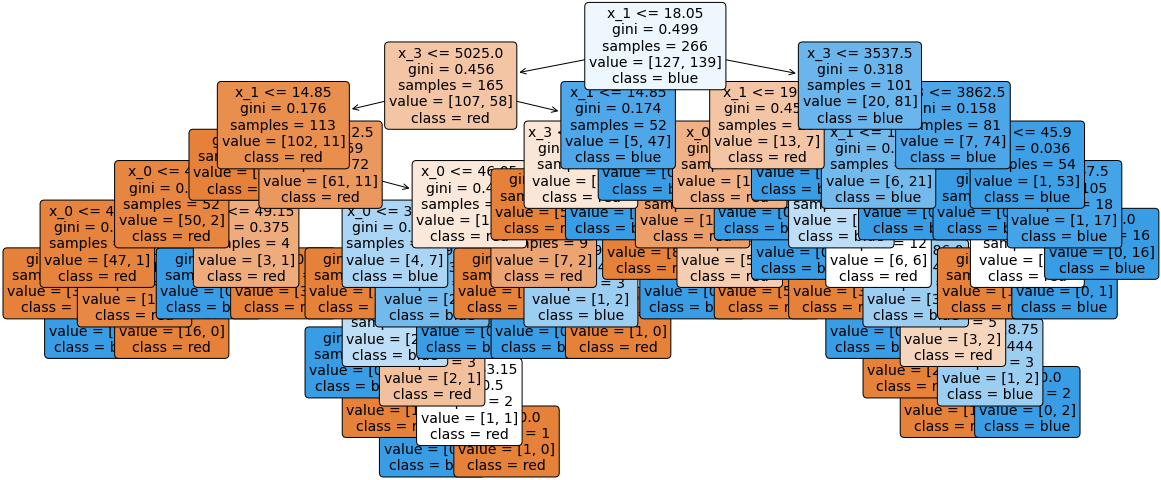

In [42]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1", "x_2", "x_3"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1", "x_2", "x_3"],
                   class_names = ["red", "blue", "green", "yellow"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

The figure above depicts a graph theoretic tree that is used to make predictions. First, starting at root node, if x_1 is less than 18.05, we go to the left child node, otherwise we go to the right child node. Then we repeat the previous process of moving to successive child nodes according to satifying the boolean condition specified at each parent node until you reach a leaf node (a node with no child nodes). The predicted class of this leaf node will be the predicted class of our feature vector $x = [x_0, x_1, x_2, x_3]^T$.

## Error Analysis

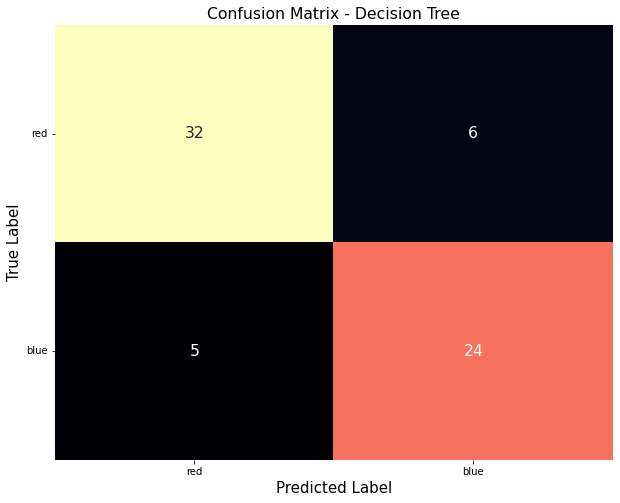

In [44]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [45]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.80      0.83      0.81        29

    accuracy                           0.84        67
   macro avg       0.83      0.83      0.83        67
weighted avg       0.84      0.84      0.84        67



The precision is pretty high with above 0.8 of accuracy.

## Regression Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.22514726553596293 

MSE reg2: 0.1791044776119403 



When the maximum depth is larger, MSE of y and $\hat y$ will become lower.